In [1]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
import torch


mnist_transform = transforms.Compose(
    [
        transforms.ToTensor(), # torchvision 이 오직 PIL Image 형태로만 받아 tensor 형태로 변환 필요
        transforms.Normalize(mean=(0.5,), std=(1.0,),)
    ]
)

In [ ]:
import urllib.request
import gzip
import shutil
import os

# if

# Define the URLs for the MNIST dataset
urls = {
    "train-images-idx3-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz"
}

# Define the directory to save the dataset
dataset_dir = "content/MNIST/raw"
os.makedirs(dataset_dir, exist_ok=True)

# Function to download and extract the dataset
def download_and_extract(url, filename):
    filepath = os.path.join(dataset_dir, filename)
    print(f"Downloading {url} to {filepath}")
    urllib.request.urlretrieve(url, filepath)
    print(f"Extracting {filepath}")
    with gzip.open(filepath, 'rb') as f_in:
        with open(filepath.replace('.gz', ''), 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    os.remove(filepath)

# Download and extract each file
for filename, url in urls.items():
    download_and_extract(url, filename)

train_set = datasets.MNIST(
    root='content/', 
    train=True, 
    download=True, 
    transform=mnist_transform
    )

test_set = datasets.MNIST(
    root='content/', 
    train=False, 
    download=True, 
    transform=mnist_transform
    )

Extracting content/MNIST/raw/train-images-idx3-ubyte.gz
Extracting content/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting content/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting content/MNIST/raw/t10k-labels-idx1-ubyte.gz


In [3]:
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=8, shuffle=False, num_workers=2)

In [4]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [5]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

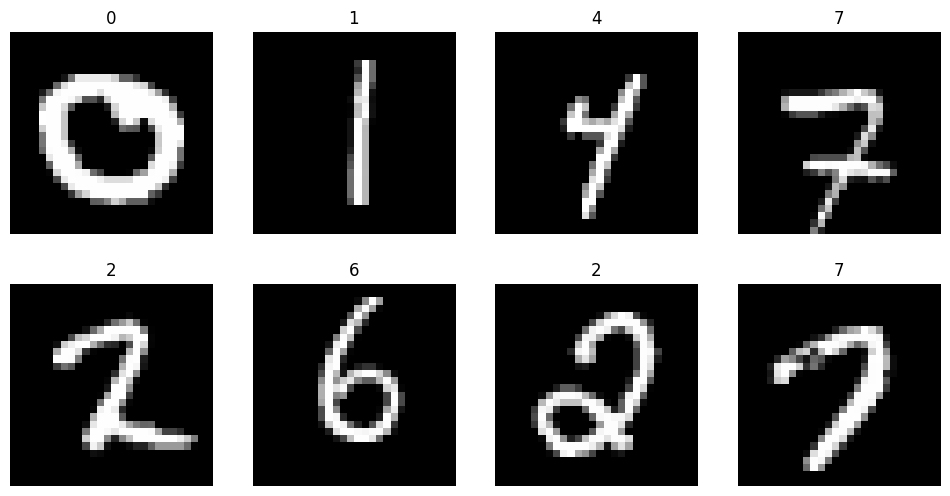

In [8]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()